In [50]:
import pandas as pd


In [51]:

# Load dataset
df = pd.read_csv("TOMATO.csv")

# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)



In [52]:
df.head()

,commodity_x,average_price,unit,supply_Volume,temperature_avg,precipitation,wind_speed,air_pressure,rainfall_mm,USD_to_NPR,diesel
Date,,,,,,,,,,,
2022-01-01,Tomato_Big,115.00,के.जी.,0,9.0,0.0,4.7,1023.5,0.0,117.49,119.0
2022-01-02,Tomato_Big,115.00,के.जी.,8000,9.8,0.0,4.5,1022.3,0.0,117.49,119.0
2022-01-03,Tomato_Big,95.00,के.जी.,22375,10.0,0.0,5.3,1020.6,0.0,117.49,119.0
2022-01-04,Tomato_Big,96.67,के.जी.,8000,10.2,0.0,5.0,1020.6,0.0,117.47,119.0
2022-01-05,Tomato_Big,86.67,के.जी.,32500,11.0,0.0,5.8,1020.6,0.0,117.55,119.0


In [53]:
df.drop(columns = ['commodity_x','unit'], inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044 entries, 2022-01-01 to 2025-10-20
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   average_price    1044 non-null   float64
 1   supply_Volume    1044 non-null   int64  
 2   temperature_avg  1044 non-null   float64
 3   precipitation    1044 non-null   float64
 4   wind_speed       1044 non-null   float64
 5   air_pressure     1044 non-null   float64
 6   rainfall_mm      1044 non-null   float64
 7   USD_to_NPR       1044 non-null   float64
 8   diesel           1044 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 81.6 KB


In [59]:
df.shape

(1015, 16)

### Step 2 — Explore the time series

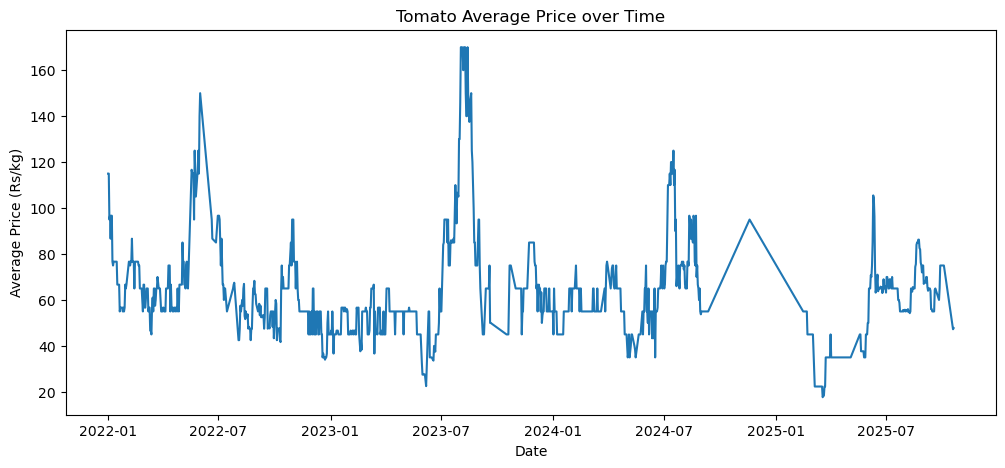

333

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df['average_price'])
plt.title('Tomato Average Price over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (Rs/kg)')
plt.show()
333

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# --- feature engineering ---
df['month'] = df.index.month
df['week'] = df.index.isocalendar().week
df['avg_price_lag1'] = df['average_price'].shift(1)
df['avg_price_lag7'] = df['average_price'].shift(7)
df['supply_lag1'] = df['supply_Volume'].shift(1)
df['avg_price_7d_mean'] = df['average_price'].rolling(7).mean()
df['avg_price_30d_std'] = df['average_price'].rolling(30).std()
df = df.dropna()

# features and target
X = df.drop(columns=['average_price'])
y = df['average_price']

# split chronologically
X_train, X_test = X.iloc[:-180], X.iloc[-180:]
y_train, y_test = y.iloc[:-180], y.iloc[-180:]

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))


MAE: 3.9634568518518165


In [58]:
df.head()


,average_price,supply_Volume,temperature_avg,precipitation,wind_speed,air_pressure,rainfall_mm,USD_to_NPR,diesel,month,week,avg_price_lag1,avg_price_lag7,supply_lag1,avg_price_7d_mean,avg_price_30d_std
Date,,,,,,,,,,,,,,,,
2022-01-30,65.00,23250,8.7,0.0,8.4,1013.0,0.0,118.44,122.0,1,4,66.67,56.67,0.0,58.811429,17.410343
2022-01-31,66.67,18000,9.2,0.0,7.1,1014.0,0.0,118.44,122.0,1,5,65.00,56.67,23250.0,60.240000,15.619227
2022-02-04,76.67,48000,5.8,41.9,9.4,1013.2,0.0,118.04,122.0,2,5,66.67,55.00,18000.0,63.335714,13.416631
2022-02-05,76.67,5000,7.1,8.4,5.0,1013.0,0.0,118.09,122.0,2,5,76.67,56.67,48000.0,66.192857,12.683441
2022-02-06,75.00,27200,8.7,0.0,6.2,1017.0,0.0,118.09,122.0,2,5,76.67,55.00,5000.0,69.050000,11.715379


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1015 entries, 2022-01-30 to 2025-10-20
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   average_price      1015 non-null   float64
 1   supply_Volume      1015 non-null   int64  
 2   temperature_avg    1015 non-null   float64
 3   precipitation      1015 non-null   float64
 4   wind_speed         1015 non-null   float64
 5   air_pressure       1015 non-null   float64
 6   rainfall_mm        1015 non-null   float64
 7   USD_to_NPR         1015 non-null   float64
 8   diesel             1015 non-null   float64
 9   month              1015 non-null   int32  
 10  week               1015 non-null   UInt32 
 11  avg_price_lag1     1015 non-null   float64
 12  avg_price_lag7     1015 non-null   float64
 13  supply_lag1        1015 non-null   float64
 14  avg_price_7d_mean  1015 non-null   float64
 15  avg_price_30d_std  1015 non-null   float64
dtypes: UIn

In [10]:
df = pd.read_csv('TOMATO_daily_synthesized.csv')



In [11]:
df.head()

,Date,commodity_x,average_price,unit,supply_Volume,temperature_avg,precipitation,wind_speed,air_pressure,rainfall_mm,USD_to_NPR,diesel
0,2022-01-01,Tomato_Big,115.00,के.जी.,0.0,9.0,0.0,4.7,1023.5,0.0,117.49,119.0
1,2022-01-02,Tomato_Big,115.00,के.जी.,8000.0,9.8,0.0,4.5,1022.3,0.0,117.49,119.0
2,2022-01-03,Tomato_Big,95.00,के.जी.,22375.0,10.0,0.0,5.3,1020.6,0.0,117.49,119.0
3,2022-01-04,Tomato_Big,96.67,के.जी.,8000.0,10.2,0.0,5.0,1020.6,0.0,117.47,119.0
4,2022-01-05,Tomato_Big,86.67,के.जी.,32500.0,11.0,0.0,5.8,1020.6,0.0,117.55,119.0


In [12]:


# Convert Date to datetime safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort by date (important for time series)
df = df.sort_values('Date')

# Set the Date column as the index
df = df.set_index('Date')


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# --- feature engineering ---
df['month'] = df.index.month
df['week'] = df.index.isocalendar().week
df['avg_price_lag1'] = df['average_price'].shift(1)
df['avg_price_lag7'] = df['average_price'].shift(7)
df['supply_lag1'] = df['supply_Volume'].shift(1)
df['avg_price_7d_mean'] = df['average_price'].rolling(7).mean()
df['avg_price_30d_std'] = df['average_price'].rolling(30).std()
df = df.dropna()

# features and target
X = df.drop(columns=['average_price','commodity_x','unit'])
y = df['average_price']

# split chronologically
X_train, X_test = X.iloc[:-180], X.iloc[-180:]
y_train, y_test = y.iloc[:-180], y.iloc[-180:]

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))


MAE: 3.316325366348163


In [14]:
df.head()

,commodity_x,average_price,unit,supply_Volume,temperature_avg,precipitation,wind_speed,air_pressure,rainfall_mm,USD_to_NPR,diesel,month,week,avg_price_lag1,avg_price_lag7,supply_lag1,avg_price_7d_mean,avg_price_30d_std
Date,,,,,,,,,,,,,,,,,,
2022-01-30,Tomato_Big,65.00,के.जी.,23250.0,8.70,0.000,8.400,1013.0,0.0,118.44,122.0,1,4,66.67,56.67,0.0,58.811429,17.410343
2022-01-31,Tomato_Big,66.67,के.जी.,18000.0,9.20,0.000,7.100,1014.0,0.0,118.44,122.0,1,5,65.00,56.67,23250.0,60.240000,15.619227
2022-02-01,Tomato_Big,69.17,के.जी.,25500.0,8.35,10.475,7.675,1013.8,0.0,118.34,122.0,2,5,66.67,55.00,18000.0,62.264286,13.377204
2022-02-02,Tomato_Big,71.67,के.जी.,33000.0,7.50,20.950,8.250,1013.6,0.0,118.24,122.0,2,5,69.17,56.67,25500.0,64.407143,12.572965
2022-02-03,Tomato_Big,74.17,के.जी.,40500.0,6.65,31.425,8.825,1013.4,0.0,118.14,122.0,2,5,71.67,55.00,33000.0,67.145714,11.555569


Epoch 001 | train 0.049976 | val 0.005289
Epoch 010 | train 0.002933 | val 0.004095
Epoch 020 | train 0.002384 | val 0.004162
[LR] 0.001000 → 0.000500
Epoch 030 | train 0.001942 | val 0.003322
[LR] 0.000500 → 0.000250
Epoch 040 | train 0.001828 | val 0.003134
[LR] 0.000250 → 0.000125
Early stopping at epoch 43. Best val: 0.002749
Test MAE : 5.39
Test MAPE: 8.11%


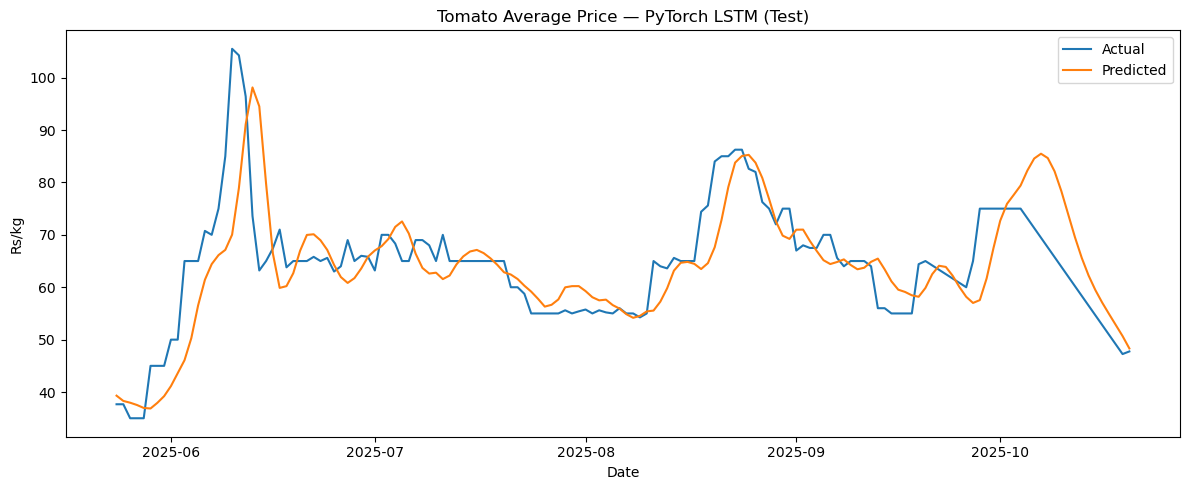

            Forecasted_Price
2025-10-21         46.334538
2025-10-22         45.002460
2025-10-23         44.230873
2025-10-24         43.914999
2025-10-25         43.937929


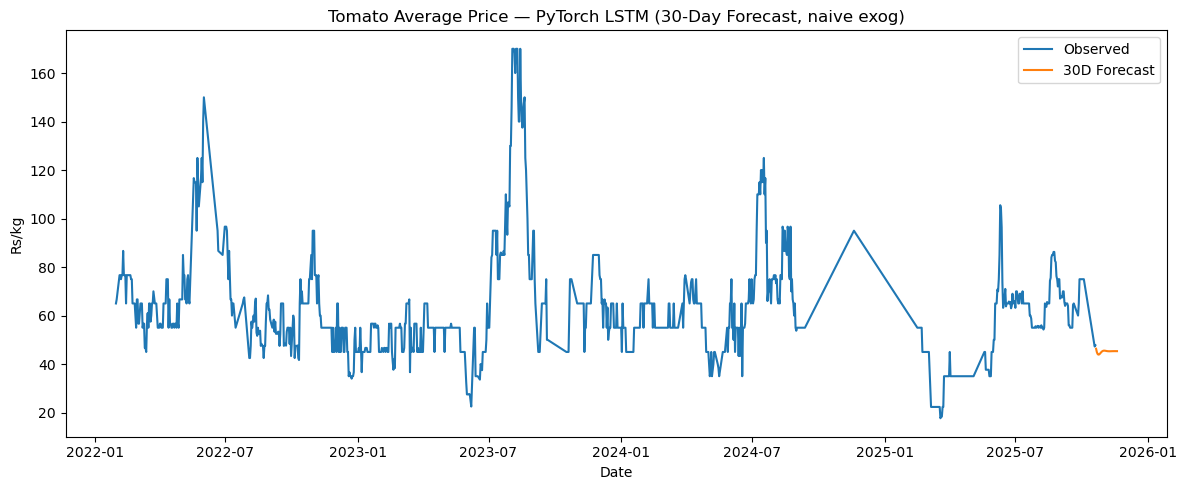

In [15]:
# ==========================================
# PyTorch LSTM — Tomato Average Price Forecast
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import random
import os

# ------------- 0) Reproducibility -------------
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# ------------- 1) Load / ensure structure -------------
# If starting from CSV (uncomment & adjust):
# df = pd.read_csv("TOMATO.csv", parse_dates=['Date']).set_index('Date')

# Ensure expected columns & order (adjust names if needed)
expected_cols = [
    'average_price','supply_Volume','temperature_avg','precipitation',
    'wind_speed','air_pressure','rainfall_mm','USD_to_NPR','diesel',
    'month','week','avg_price_lag1','avg_price_lag7','supply_lag1',
    'avg_price_7d_mean','avg_price_30d_std'
]
missing = [c for c in expected_cols if c not in df.columns]
assert not missing, f"Missing columns in df: {missing}"

# Sort by date, keep only needed columns in correct order
df = df[expected_cols].sort_index()

# (Safety) Convert any UInt/int types to float for scaling
df = df.astype({c: float for c in df.columns})

target_col = 'average_price'
target_idx = df.columns.get_loc(target_col)

# ------------- 2) Chronological split -------------
test_horizon = 180  # last ~6 months for test
train_df = df.iloc[:-test_horizon].copy()
test_df  = df.iloc[-test_horizon:].copy()

# ------------- 3) Scale (fit on train only) -------------
scaler = MinMaxScaler()
scaler.fit(train_df.values)
train_scaled = scaler.transform(train_df.values)
test_scaled  = scaler.transform(test_df.values)

# ------------- 4) Sliding windows -------------
def make_sequences(arr2d, window=30, horizon=1, target_index=0):
    X, y = [], []
    N, F = arr2d.shape
    for i in range(N - window - horizon + 1):
        X.append(arr2d[i:i+window, :])                        # (window, F)
        y.append(arr2d[i+window+horizon-1, target_index])     # scalar (scaled)
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

WINDOW = 30
HORIZON = 1  # next-day prediction

X_train, y_train = make_sequences(train_scaled, window=WINDOW, horizon=HORIZON, target_index=target_idx)
X_test,  y_test  = make_sequences(test_scaled,  window=WINDOW, horizon=HORIZON, target_index=target_idx)

# Index alignment for plotting (we lose WINDOW rows to form the first window)
test_index_aligned = test_df.index[WINDOW:]

# ------------- 5) Torch Dataset / DataLoader -------------
class SeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)   # (N, T, F)
        self.y = torch.from_numpy(y)   # (N,)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_ds = SeqDataset(X_train, y_train)
test_ds  = SeqDataset(X_test, y_test)

BATCH = 32
train_dl = DataLoader(train_ds, batch_size=BATCH, shuffle=True, drop_last=False)
val_dl   = DataLoader(test_ds,  batch_size=BATCH, shuffle=False, drop_last=False)  # using test as validation

# ------------- 6) LSTM model -------------
class PriceLSTM(nn.Module):
    def __init__(self, n_features, hidden1=64, hidden2=32, dropout=0.2):
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=n_features, hidden_size=hidden1, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.lstm2 = nn.LSTM(input_size=hidden1, hidden_size=hidden2, batch_first=True)
        self.fc1 = nn.Linear(hidden2, 16)
        self.act = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):            # x: (B, T, F)
        x, _ = self.lstm1(x)         # (B, T, H1)
        x = self.dropout(x)
        x, _ = self.lstm2(x)         # (B, T, H2)
        x = x[:, -1, :]              # last timestep (B, H2)
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)              # (B, 1)
        return x.squeeze(1)          # (B,)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PriceLSTM(n_features=X_train.shape[-1]).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# Your version doesn't support verbose arg → omit it
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5)

# ------------- 7) Training w/ early stopping -------------
EPOCHS = 200
patience = 12
best_val = float('inf')
best_state = None
wait = 0

for epoch in range(1, EPOCHS+1):
    # Train
    model.train()
    train_loss = 0.0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_ds)

    # Validate
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item() * xb.size(0)
    val_loss /= len(test_ds)

    # LR scheduling
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_loss)
    new_lr = optimizer.param_groups[0]['lr']
    if new_lr != old_lr:
        print(f"[LR] {old_lr:.6f} → {new_lr:.6f}")

    # Early stopping
    if val_loss < best_val - 1e-6:
        best_val = val_loss
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        wait = 0
    else:
        wait += 1

    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | train {train_loss:.6f} | val {val_loss:.6f}")

    if wait >= patience:
        print(f"Early stopping at epoch {epoch}. Best val: {best_val:.6f}")
        break

# Load best weights
if best_state is not None:
    model.load_state_dict({k: v.to(device) for k, v in best_state.items()})

# ------------- 8) Evaluate on test (invert scaling) -------------
model.eval()
y_pred_scaled = []
with torch.no_grad():
    for xb, _ in val_dl:
        xb = xb.to(device)
        out = model(xb).detach().cpu().numpy()
        y_pred_scaled.append(out)
y_pred_scaled = np.concatenate(y_pred_scaled, axis=0)

def invert_target_scaling(y_scaled_vec):
    """Invert scaling for the target only."""
    tmp = np.zeros((len(y_scaled_vec), df.shape[1]))
    tmp[:, target_idx] = y_scaled_vec.reshape(-1)
    inv = scaler.inverse_transform(tmp)
    return inv[:, target_idx]

y_test_inv = invert_target_scaling(y_test)
y_pred_inv = invert_target_scaling(y_pred_scaled)

mae  = mean_absolute_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print(f"Test MAE : {mae:.2f}")
print(f"Test MAPE: {mape*100:.2f}%")

plt.figure(figsize=(12,5))
plt.plot(test_index_aligned, y_test_inv, label='Actual')
plt.plot(test_index_aligned, y_pred_inv, label='Predicted')
plt.title('Tomato Average Price — PyTorch LSTM (Test)')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.legend(); plt.tight_layout()
plt.show()

# ------------- 9) 30-day iterative forecast (naive exog) -------------
future_days = 30

# Start from the last WINDOW rows of the FULL (scaled) series
full_scaled = scaler.transform(df.values)
window_seq = full_scaled[-WINDOW:, :].copy()  # (T, F)

future_preds_inv = []
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='D')

for step in range(future_days):
    x = torch.from_numpy(window_seq[np.newaxis, :, :].astype(np.float32)).to(device)
    with torch.no_grad():
        pred_scaled = model(x).cpu().numpy()[0]  # scalar (scaled)
    pred_inv = invert_target_scaling(np.array([pred_scaled]))[0]
    future_preds_inv.append(pred_inv)

    # ---- naive exogenous persistence: keep other features same as last row
    next_row = window_seq[-1, :].copy()
    next_row[target_idx] = pred_scaled

    # Shift window and append
    window_seq = np.vstack([window_seq[1:], next_row])

forecast_df = pd.DataFrame({'Forecasted_Price': future_preds_inv}, index=future_dates)
print(forecast_df.head())

plt.figure(figsize=(12,5))
plt.plot(df.index, df[target_col], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecasted_Price'], label='30D Forecast')
plt.title('Tomato Average Price — PyTorch LSTM (30-Day Forecast, naive exog)')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.legend(); plt.tight_layout()
plt.show()


            Forecasted_Price
2025-10-21         46.334538
2025-10-22         49.077736
2025-10-23         53.793931
2025-10-24         58.990000
2025-10-25         63.988619
2025-10-26         68.230207
2025-10-27         71.284903
2025-10-28         72.941907
2025-10-29         73.242918
2025-10-30         72.453925
Saved forecast to tomato_30day_forecast.csv


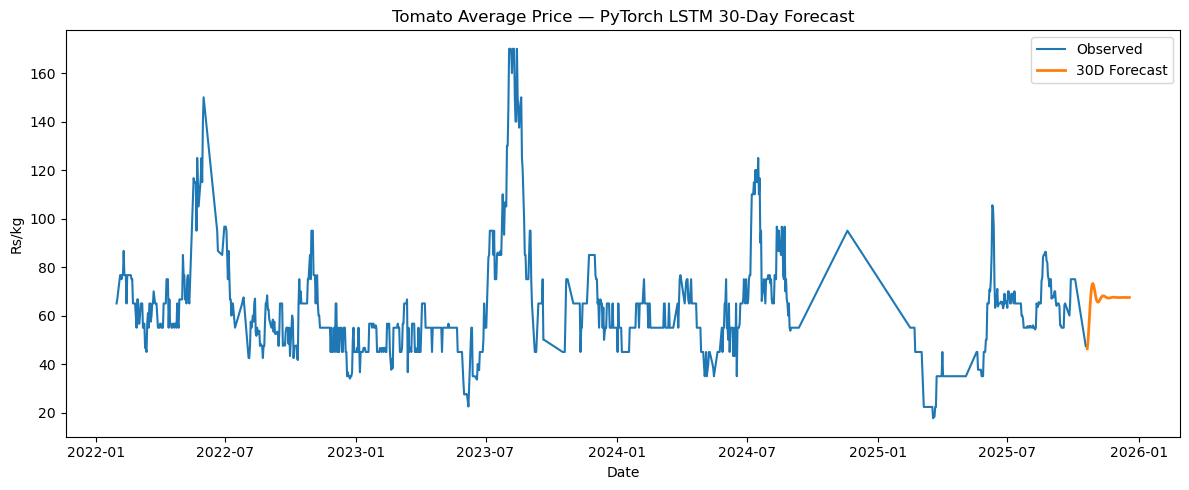

In [16]:
# ------------- 9) 30-day iterative forecast (with exogenous baseline) -------------
future_days = 60

# Columns setup
all_cols   = df.columns.tolist()
exog_cols  = [c for c in all_cols if c != target_col]

# Baseline for exogenous features:
# Use last 28-day mean (stable, avoids leakage)
exog_baseline_orig = df[exog_cols].iloc[-28:].mean()

# Optionally, you can use seasonal day-of-year means instead:
# doy_means = df.copy()
# doy_means['doy'] = doy_means.index.dayofyear
# seasonal_means = doy_means.groupby('doy')[exog_cols].mean()

# Start window from the last WINDOW rows of the FULL (scaled) series
full_scaled = scaler.transform(df.values)
window_seq = full_scaled[-WINDOW:, :].copy()  # (T, F)

future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='D')
future_preds_inv = []

for step, fdate in enumerate(future_dates):
    # 1) Predict next day's scaled target using current window
    x = torch.from_numpy(window_seq[np.newaxis, :, :].astype(np.float32)).to(device)
    with torch.no_grad():
        pred_scaled = model(x).cpu().numpy()[0]  # scalar in scaled space

    # 2) Invert target to original units for readability
    pred_inv = invert_target_scaling(np.array([pred_scaled]))[0]
    future_preds_inv.append(pred_inv)

    # 3) Build the *original-space* next feature row:
    #    - target = newly predicted price
    #    - exogenous = baseline (last-28d mean)  [OR seasonal profile for fdate]
    next_orig = exog_baseline_orig.copy()
    # If using seasonal profile, uncomment:
    # next_orig = seasonal_means.loc[fdate.dayofyear]

    # Insert the target into the row
    next_row_orig = pd.Series(index=all_cols, dtype=float)
    next_row_orig[target_col] = pred_inv
    next_row_orig.update(next_orig)

    # 4) Scale the next row to model space
    next_row_scaled = scaler.transform(next_row_orig.values.reshape(1, -1))[0]

    # 5) Shift the window and append the new scaled row
    window_seq = np.vstack([window_seq[1:], next_row_scaled])

# Results dataframe
forecast_df = pd.DataFrame({'Forecasted_Price': future_preds_inv}, index=future_dates)
print(forecast_df.head(10))

# Save forecast
forecast_df.to_csv("tomato_30day_forecast.csv", index=True)
print("Saved forecast to tomato_30day_forecast.csv")

# Plot
plt.figure(figsize=(12,5))
plt.plot(df.index, df[target_col], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecasted_Price'], label='30D Forecast', linewidth=2)
plt.title('Tomato Average Price — PyTorch LSTM 30-Day Forecast')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.legend(); plt.tight_layout()
plt.show()


=== XGBoost Test Metrics ===
MAE  : 3.29
RMSE : 4.68
MAPE : 5.31%
SMAPE: 5.29%
R²   : 0.891
MASE : 1.652
Directional Accuracy: 38.55%


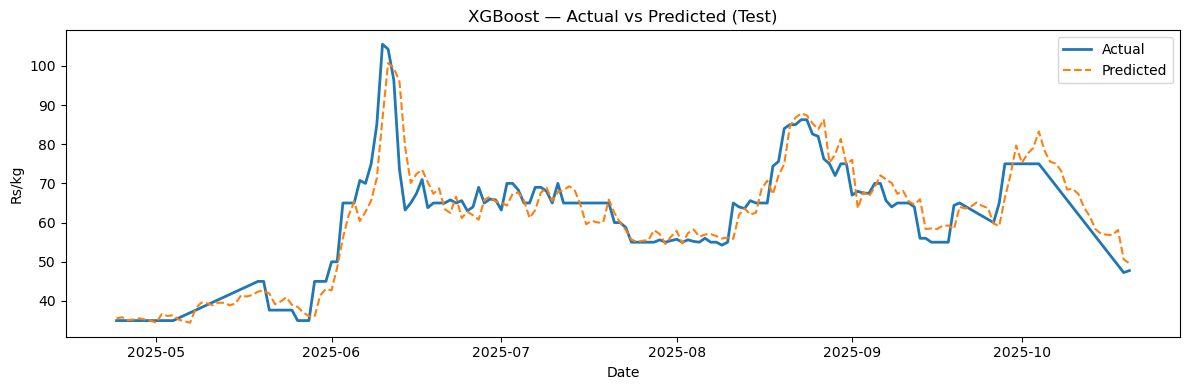

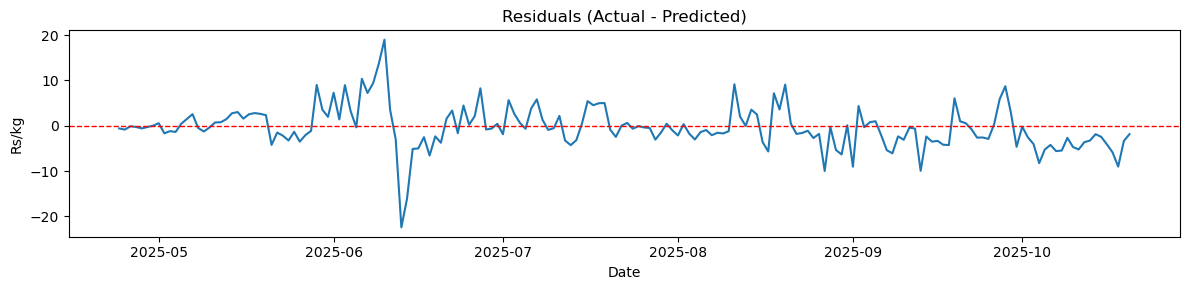


Top feature importances (gain):
avg_price_lag1       2923.286621
avg_price_7d_mean     742.450134
avg_price_lag7         78.777130
diesel                 59.389542
week                   25.802696
month                  22.940767
USD_to_NPR             19.358055
supply_lag1            17.018909
rainfall_mm            16.562653
wind_speed             15.566428
dtype: float64

Forecast (head):
            Forecasted_Price
2025-10-21         50.382572
2025-10-22         55.006420
2025-10-23         53.646755
2025-10-24         53.440498
2025-10-25         53.496567


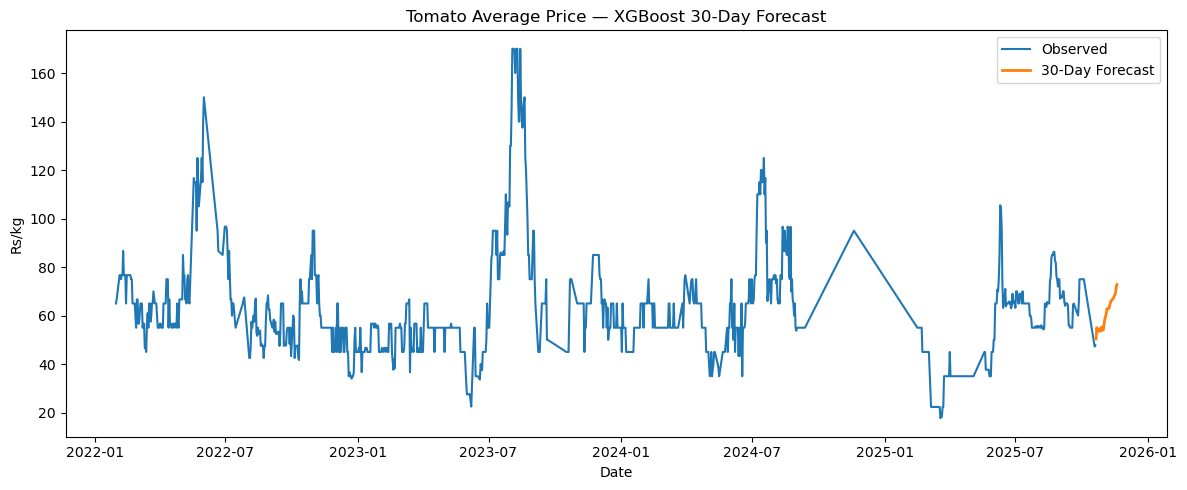

Saved: tomato_xgb_forecast_30d.csv


In [17]:
# ==========================================
# XGBoost — Tomato Average Price Forecast
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ------------------ 0) Ensure structure ------------------
# If starting from CSV, uncomment:
# df = pd.read_csv("TOMATO.csv", parse_dates=['Date']).set_index('Date')

expected_cols = [
    'average_price','supply_Volume','temperature_avg','precipitation',
    'wind_speed','air_pressure','rainfall_mm','USD_to_NPR','diesel',
    'month','week','avg_price_lag1','avg_price_lag7','supply_lag1',
    'avg_price_7d_mean','avg_price_30d_std'
]
missing = [c for c in expected_cols if c not in df.columns]
assert not missing, f"Missing columns: {missing}"
df = df[expected_cols].sort_index()

target_col = 'average_price'
X = df.drop(columns=[target_col])
y = df[target_col]

# ------------------ 1) Chronological split ------------------
test_horizon = 180  # last ~6 months as test
X_train, X_test = X.iloc[:-test_horizon], X.iloc[-test_horizon:]
y_train, y_test = y.iloc[:-test_horizon], y.iloc[-test_horizon:]

# ------------------ 2) Train XGBoost ------------------
model_xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42
)
model_xgb.fit(X_train, y_train)

# ------------------ 3) Evaluate on test ------------------
y_pred = model_xgb.predict(X_test)

def _safe_mape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100.0

def _smape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    denom = np.where(denom < eps, eps, denom)
    return np.mean(np.abs(y_true - y_pred) / denom) * 100.0

def _mase(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    if len(y_true) < 2:
        return np.nan
    naive_mae = np.mean(np.abs(np.diff(y_true)))
    if naive_mae == 0:
        return np.nan
    return mean_absolute_error(y_true, y_pred) / naive_mae

def _directional_accuracy(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    if len(y_true) < 2:
        return np.nan
    return (np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred))).mean() * 100.0

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
mape = _safe_mape(y_test, y_pred)
smape = _smape(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
mase = _mase(y_test, y_pred)
da   = _directional_accuracy(y_test, y_pred)

print("=== XGBoost Test Metrics ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"R²   : {r2:.3f}")
print(f"MASE : {mase:.3f}")
print(f"Directional Accuracy: {da:.2f}%")

plt.figure(figsize=(12,4))
plt.plot(X_test.index, y_test, label='Actual', linewidth=2)
plt.plot(X_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('XGBoost — Actual vs Predicted (Test)')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.legend(); plt.tight_layout()
plt.show()

resid = y_test - y_pred
plt.figure(figsize=(12,3))
plt.plot(X_test.index, resid)
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.tight_layout()
plt.show()

# ------------------ 4) Feature importance (optional) ------------------
try:
    imp = model_xgb.get_booster().get_score(importance_type='gain')
    imp_series = pd.Series(imp).sort_values(ascending=False)
    print("\nTop feature importances (gain):")
    print(imp_series.head(10))
except Exception as e:
    pass

# ------------------ 5) Multi-step iterative forecast ------------------
# Forecast next N days by updating lag/rolling features from model predictions.
FUTURE_DAYS = 30   # set 60 if you want two months

# a) Prepare baseline for unknown future exogenous features
exog_cols = ['supply_Volume','temperature_avg','precipitation','wind_speed',
             'air_pressure','rainfall_mm','USD_to_NPR','diesel']
exog_baseline = df[exog_cols].iloc[-28:].mean()  # last-28-day mean

# (Optionally) use seasonal day-of-year means instead of a flat baseline:
# d = df.copy()
# d['doy'] = d.index.dayofyear
# seasonal_means = d.groupby('doy')[exog_cols].mean()

# b) Initialize recent price history for lags/rollings
recent_prices = list(df[target_col].iloc[-30:].values)  # last 30 days
assert len(recent_prices) >= 30

# c) Start iterative rollout
last_date = df.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=FUTURE_DAYS, freq='D')

future_preds = []

for fdate in future_dates:
    # Compose next feature row (original scale) --------------------------
    row = {}

    # Exogenous: flat baseline or seasonal
    # row.update(seasonal_means.loc[fdate.dayofyear].to_dict())  # seasonal option
    row.update(exog_baseline.to_dict())                           # baseline option

    # Calendar features
    row['month'] = float(fdate.month)
    # week number (use ISO week). cast to float to match your float dtypes
    row['week'] = float(pd.Timestamp(fdate).isocalendar().week)

    # Lag/rolling features based on recent predicted/observed prices
    row['avg_price_lag1'] = float(recent_prices[-1])
    row['avg_price_lag7'] = float(recent_prices[-7]) if len(recent_prices) >= 7 else float(recent_prices[-1])
    row['avg_price_7d_mean'] = float(np.mean(recent_prices[-7:]))
    row['avg_price_30d_std'] = float(np.std(recent_prices[-30:], ddof=0))

    # If supply_lag1 is defined as lag of supply_Volume, use the same baseline supply
    row['supply_lag1'] = float(exog_baseline['supply_Volume'])

    # IMPORTANT: average_price (target) is NOT part of X (we predict it)
    # Build DataFrame in the *exact* column order of X
    next_X = pd.DataFrame([row], columns=X.columns, index=[fdate])

    # Predict next day's price
    next_pred = float(model_xgb.predict(next_X)[0])
    future_preds.append(next_pred)

    # Update rolling price history
    recent_prices.append(next_pred)

# d) Collect forecast results
forecast_df = pd.DataFrame({'Forecasted_Price': future_preds}, index=future_dates)
print("\nForecast (head):")
print(forecast_df.head())

# e) Plot forecast appended to history
plt.figure(figsize=(12,5))
plt.plot(df.index, df[target_col], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecasted_Price'], label=f'{FUTURE_DAYS}-Day Forecast', linewidth=2)
plt.title(f'Tomato Average Price — XGBoost {FUTURE_DAYS}-Day Forecast')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.legend(); plt.tight_layout()
plt.show()

# f) Save forecast
forecast_df.to_csv(f"tomato_xgb_forecast_{FUTURE_DAYS}d.csv")
print(f"Saved: tomato_xgb_forecast_{FUTURE_DAYS}d.csv")


Epoch 001 | train 0.049976 | val 0.005289
Epoch 010 | train 0.002933 | val 0.004095
Epoch 020 | train 0.002384 | val 0.004162
[LR] 0.001000 → 0.000500
Epoch 030 | train 0.001942 | val 0.003322
[LR] 0.000500 → 0.000250
Epoch 040 | train 0.001828 | val 0.003134
[LR] 0.000250 → 0.000125
Early stopping at epoch 43. Best val: 0.002749

=== LSTM Test Metrics ===
MAE  : 5.39
RMSE : 7.99
MAPE : 8.11%
SMAPE: 8.14%
R²   : 0.495
MASE : 2.370
Directional Accuracy: 36.91%


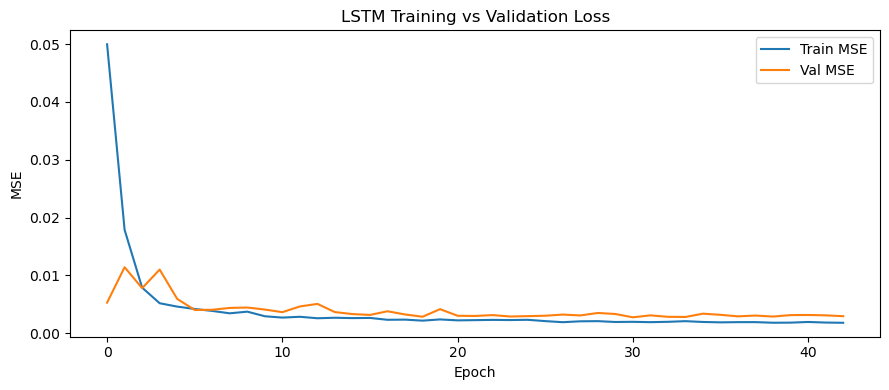

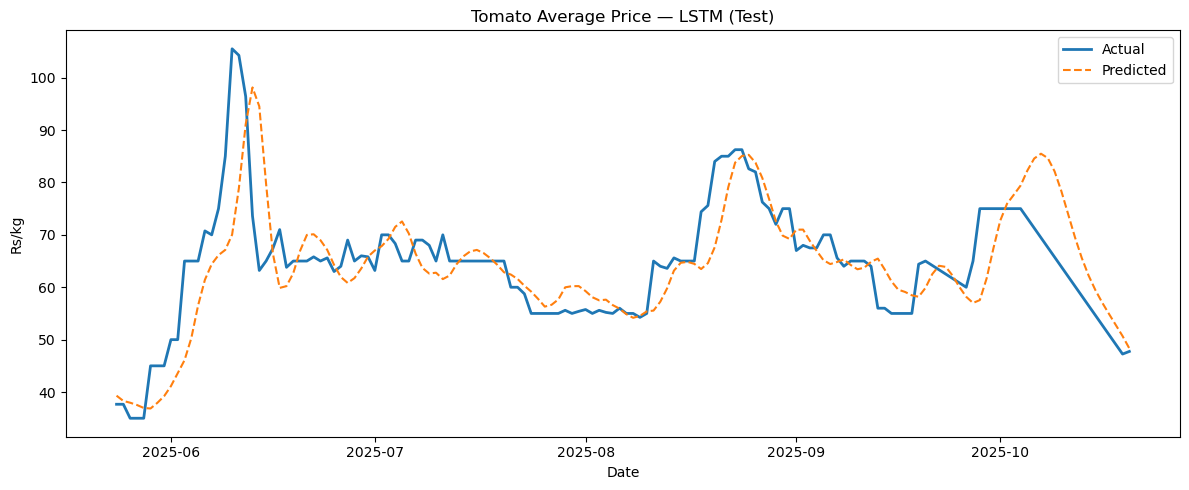

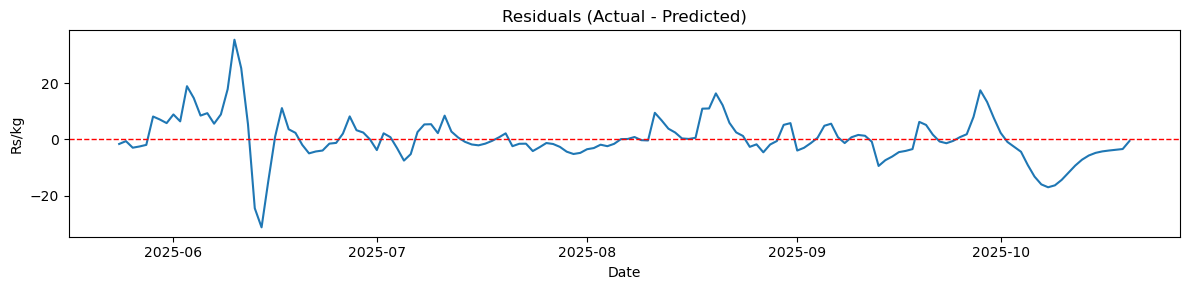


Forecast head:
            Forecasted_Price
2025-10-21         46.334538
2025-10-22         45.002460
2025-10-23         44.230873
2025-10-24         43.914999
2025-10-25         43.937929
Saved forecast to tomato_lstm_forecast_30d.csv


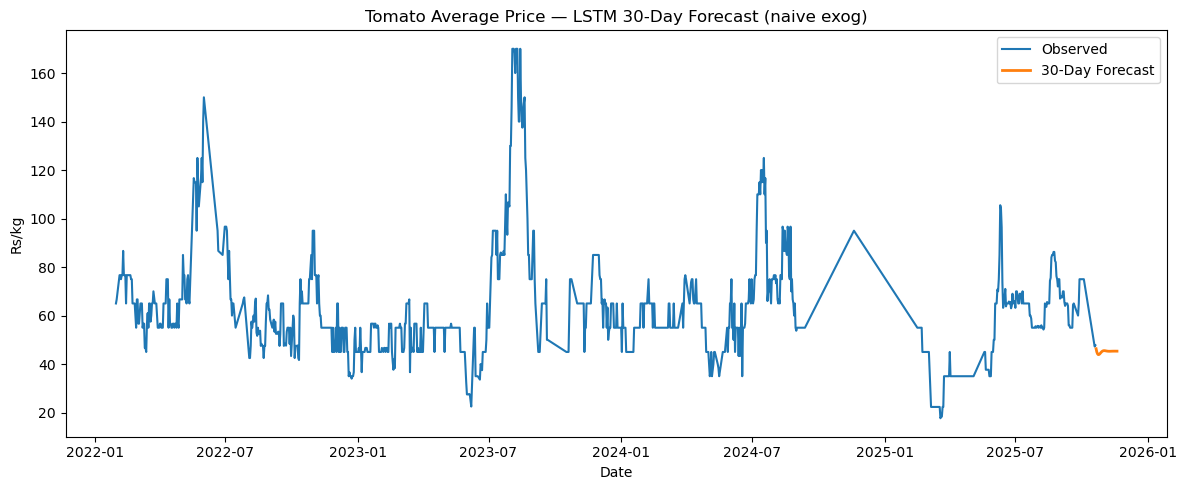

In [18]:
# ==========================================
# PyTorch LSTM — Tomato Average Price Forecast (with metrics)
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import random
import os

# ---------------- 0) Reproducibility ----------------
SEED = 42
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)

# ---------------- 1) Load / ensure structure ----------------
# If starting from CSV, UNCOMMENT the next two lines:
# df = pd.read_csv("TOMATO.csv", parse_dates=['Date'])
# df = df.set_index('Date').sort_index()

# Ensure expected columns & order
expected_cols = [
    'average_price','supply_Volume','temperature_avg','precipitation',
    'wind_speed','air_pressure','rainfall_mm','USD_to_NPR','diesel',
    'month','week','avg_price_lag1','avg_price_lag7','supply_lag1',
    'avg_price_7d_mean','avg_price_30d_std'
]
missing = [c for c in expected_cols if c not in df.columns]
assert not missing, f"Missing columns in df: {missing}"
df = df[expected_cols].sort_index()

# Numeric safety (week can be UInt32 etc.)
df = df.astype({c: float for c in df.columns})

target_col = 'average_price'
target_idx = df.columns.get_loc(target_col)

# ---------------- 2) Chronological split ----------------
TEST_HORIZON = 180  # last ~6 months for test
train_df = df.iloc[:-TEST_HORIZON].copy()
test_df  = df.iloc[-TEST_HORIZON:].copy()

# ---------------- 3) Scale (fit on train only) ----------------
scaler = MinMaxScaler()
scaler.fit(train_df.values)
train_scaled = scaler.transform(train_df.values)
test_scaled  = scaler.transform(test_df.values)

# ---------------- 4) Sliding windows ----------------
def make_sequences(arr2d, window=30, horizon=1, target_index=0):
    X, y = [], []
    N, F = arr2d.shape
    for i in range(N - window - horizon + 1):
        X.append(arr2d[i:i+window, :])                      # (window, F)
        y.append(arr2d[i+window+horizon-1, target_index])   # scalar (scaled)
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

WINDOW  = 30
HORIZON = 1  # predict next day
X_train, y_train = make_sequences(train_scaled, window=WINDOW, horizon=HORIZON, target_index=target_idx)
X_test,  y_test  = make_sequences(test_scaled,  window=WINDOW, horizon=HORIZON, target_index=target_idx)

# index alignment for plotting (lose first WINDOW rows to create first window)
test_index_aligned = test_df.index[WINDOW:]

# ---------------- 5) Torch Dataset / DataLoader ----------------
class SeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_ds = SeqDataset(X_train, y_train)
test_ds  = SeqDataset(X_test, y_test)

BATCH = 32
train_dl = DataLoader(train_ds, batch_size=BATCH, shuffle=True, drop_last=False)
val_dl   = DataLoader(test_ds,  batch_size=BATCH, shuffle=False, drop_last=False)

# ---------------- 6) LSTM model ----------------
class PriceLSTM(nn.Module):
    def __init__(self, n_features, hidden1=64, hidden2=32, dropout=0.2):
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=n_features, hidden_size=hidden1, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.lstm2 = nn.LSTM(input_size=hidden1, hidden_size=hidden2, batch_first=True)
        self.fc1 = nn.Linear(hidden2, 16)
        self.act = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
    def forward(self, x):     # x: (B, T, F)
        x, _ = self.lstm1(x)  # (B, T, H1)
        x = self.dropout(x)
        x, _ = self.lstm2(x)  # (B, T, H2)
        x = x[:, -1, :]       # last step
        x = self.fc1(x); x = self.act(x)
        x = self.fc2(x)       # (B, 1)
        return x.squeeze(1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PriceLSTM(n_features=X_train.shape[-1]).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5)

# ---------------- 7) Training w/ early stopping ----------------
EPOCHS = 200
PATIENCE = 12
best_val = float('inf'); best_state = None; wait = 0
train_losses, val_losses = [], []

for epoch in range(1, EPOCHS+1):
    # train
    model.train(); running = 0.0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward(); optimizer.step()
        running += loss.item() * xb.size(0)
    train_loss = running / len(train_ds)
    train_losses.append(train_loss)

    # validate
    model.eval(); running = 0.0
    with torch.no_grad():
        for xb, yb in val_dl:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            loss = criterion(pred, yb)
            running += loss.item() * xb.size(0)
    val_loss = running / len(test_ds)
    val_losses.append(val_loss)

    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_loss)
    new_lr = optimizer.param_groups[0]['lr']
    if new_lr != old_lr:
        print(f"[LR] {old_lr:.6f} → {new_lr:.6f}")

    if val_loss < best_val - 1e-6:
        best_val = val_loss
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        wait = 0
    else:
        wait += 1

    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | train {train_loss:.6f} | val {val_loss:.6f}")
    if wait >= PATIENCE:
        print(f"Early stopping at epoch {epoch}. Best val: {best_val:.6f}")
        break

if best_state is not None:
    model.load_state_dict({k: v.to(device) for k, v in best_state.items()})

# ---------------- 8) Evaluate on test (invert scaling) ----------------
model.eval()
y_pred_scaled = []
with torch.no_grad():
    for xb, _ in val_dl:
        xb = xb.to(device)
        y_pred_scaled.append(model(xb).detach().cpu().numpy())
y_pred_scaled = np.concatenate(y_pred_scaled, axis=0)

def invert_target_scaling(y_scaled_vec):
    tmp = np.zeros((len(y_scaled_vec), df.shape[1]))
    tmp[:, target_idx] = y_scaled_vec.reshape(-1)
    inv = scaler.inverse_transform(tmp)
    return inv[:, target_idx]

y_test_inv = invert_target_scaling(y_test)
y_pred_inv = invert_target_scaling(y_pred_scaled)

# ---------------- 9) Metrics (full suite) ----------------
def _safe_mape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float); y_pred = np.asarray(y_pred, dtype=float)
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100.0

def _smape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, dtype=float); y_pred = np.asarray(y_pred, dtype=float)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    denom = np.where(denom < eps, eps, denom)
    return np.mean(np.abs(y_true - y_pred) / denom) * 100.0

def _mase(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float); y_pred = np.asarray(y_pred, dtype=float)
    if len(y_true) < 2: return np.nan
    naive_mae = np.mean(np.abs(np.diff(y_true)))  # naive: y_{t-1}
    if naive_mae == 0: return np.nan
    return mean_absolute_error(y_true, y_pred) / naive_mae

def _directional_accuracy(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float); y_pred = np.asarray(y_pred, dtype=float)
    if len(y_true) < 2: return np.nan
    return (np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred))).mean() * 100.0

rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae_lstm  = mean_absolute_error(y_test_inv, y_pred_inv)
mape_lstm = _safe_mape(y_test_inv, y_pred_inv)
smape_lstm = _smape(y_test_inv, y_pred_inv)
r2_lstm   = r2_score(y_test_inv, y_pred_inv)
mase_lstm = _mase(y_test_inv, y_pred_inv)
da_lstm   = _directional_accuracy(y_test_inv, y_pred_inv)

print("\n=== LSTM Test Metrics ===")
print(f"MAE  : {mae_lstm:.2f}")
print(f"RMSE : {rmse_lstm:.2f}")
print(f"MAPE : {mape_lstm:.2f}%")
print(f"SMAPE: {smape_lstm:.2f}%")
print(f"R²   : {r2_lstm:.3f}")
print(f"MASE : {mase_lstm:.3f}")
print(f"Directional Accuracy: {da_lstm:.2f}%")

# Learning curves
plt.figure(figsize=(9,4))
plt.plot(train_losses, label='Train MSE')
plt.plot(val_losses, label='Val MSE')
plt.title('LSTM Training vs Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.legend(); plt.tight_layout(); plt.show()

# Actual vs Predicted & Residuals
plt.figure(figsize=(12,5))
plt.plot(test_index_aligned, y_test_inv, label='Actual', linewidth=2)
plt.plot(test_index_aligned, y_pred_inv, label='Predicted', linestyle='--')
plt.title('Tomato Average Price — LSTM (Test)'); plt.xlabel('Date'); plt.ylabel('Rs/kg')
plt.legend(); plt.tight_layout(); plt.show()

resid = y_test_inv - y_pred_inv
plt.figure(figsize=(12,3))
plt.plot(test_index_aligned, resid); plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('Residuals (Actual - Predicted)'); plt.xlabel('Date'); plt.ylabel('Rs/kg')
plt.tight_layout(); plt.show()

# ---------------- 10) Multi-step forecast (configurable) ----------------
FUTURE_DAYS = 30  # set to 60 for 2 months, etc.

# Start from the last WINDOW rows of the FULL scaled series
full_scaled = scaler.transform(df.values)
window_seq = full_scaled[-WINDOW:, :].copy()  # (T, F)

future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=FUTURE_DAYS, freq='D')
future_preds_inv = []

for _ in future_dates:
    x = torch.from_numpy(window_seq[np.newaxis, :, :].astype(np.float32)).to(device)
    with torch.no_grad():
        pred_scaled = model(x).cpu().numpy()[0]  # scalar (scaled)
    # invert to original units
    pred_inv = invert_target_scaling(np.array([pred_scaled]))[0]
    future_preds_inv.append(pred_inv)

    # naive exog persistence: copy last row, replace target with predicted (scaled)
    next_row = window_seq[-1, :].copy()
    next_row[target_idx] = pred_scaled
    window_seq = np.vstack([window_seq[1:], next_row])

forecast_df = pd.DataFrame({'Forecasted_Price': future_preds_inv}, index=future_dates)
print("\nForecast head:")
print(forecast_df.head())
forecast_df.to_csv(f"tomato_lstm_forecast_{FUTURE_DAYS}d.csv")
print(f"Saved forecast to tomato_lstm_forecast_{FUTURE_DAYS}d.csv")

plt.figure(figsize=(12,5))
plt.plot(df.index, df[target_col], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecasted_Price'], label=f'{FUTURE_DAYS}-Day Forecast', linewidth=2)
plt.title(f'Tomato Average Price — LSTM {FUTURE_DAYS}-Day Forecast (naive exog)')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.legend(); plt.tight_layout(); plt.show()


In [19]:
df = pd.read_csv('TOMATO_daily_with_seasons_festivals.csv')

In [20]:
df.head()

,Date,Commodity,Average_Price,Unit,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,USD_TO_NPR,Diesel,Season,festival_name,Dashain,Tihar,Holi,NepalNewYear,is_festival
0,1/1/2022,Tomato_Big,115.00,kg,0.0,9.0,0.0,4.7,1023.5,0.0,117.49,119.0,Winter,NaN,0,0,0,0,0
1,1/2/2022,Tomato_Big,115.00,kg,8000.0,9.8,0.0,4.5,1022.3,0.0,117.49,119.0,Winter,NaN,0,0,0,0,0
2,1/3/2022,Tomato_Big,95.00,kg,22375.0,10.0,0.0,5.3,1020.6,0.0,117.49,119.0,Winter,NaN,0,0,0,0,0
3,1/4/2022,Tomato_Big,96.67,kg,8000.0,10.2,0.0,5.0,1020.6,0.0,117.47,119.0,Winter,NaN,0,0,0,0,0
4,1/5/2022,Tomato_Big,86.67,kg,32500.0,11.0,0.0,5.8,1020.6,0.0,117.55,119.0,Winter,NaN,0,0,0,0,0


In [21]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')


In [22]:
df.head()

,Date,Commodity,Average_Price,Unit,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,USD_TO_NPR,Diesel,Season,festival_name,Dashain,Tihar,Holi,NepalNewYear,is_festival
0,2022-01-01,Tomato_Big,115.00,kg,0.0,9.0,0.0,4.7,1023.5,0.0,117.49,119.0,Winter,NaN,0,0,0,0,0
1,2022-01-02,Tomato_Big,115.00,kg,8000.0,9.8,0.0,4.5,1022.3,0.0,117.49,119.0,Winter,NaN,0,0,0,0,0
2,2022-01-03,Tomato_Big,95.00,kg,22375.0,10.0,0.0,5.3,1020.6,0.0,117.49,119.0,Winter,NaN,0,0,0,0,0
3,2022-01-04,Tomato_Big,96.67,kg,8000.0,10.2,0.0,5.0,1020.6,0.0,117.47,119.0,Winter,NaN,0,0,0,0,0
4,2022-01-05,Tomato_Big,86.67,kg,32500.0,11.0,0.0,5.8,1020.6,0.0,117.55,119.0,Winter,NaN,0,0,0,0,0


In [23]:
df.drop(columns = 'festival_name', inplace = True)

In [24]:
df.head()

,Date,Commodity,Average_Price,Unit,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,USD_TO_NPR,Diesel,Season,Dashain,Tihar,Holi,NepalNewYear,is_festival
0,2022-01-01,Tomato_Big,115.00,kg,0.0,9.0,0.0,4.7,1023.5,0.0,117.49,119.0,Winter,0,0,0,0,0
1,2022-01-02,Tomato_Big,115.00,kg,8000.0,9.8,0.0,4.5,1022.3,0.0,117.49,119.0,Winter,0,0,0,0,0
2,2022-01-03,Tomato_Big,95.00,kg,22375.0,10.0,0.0,5.3,1020.6,0.0,117.49,119.0,Winter,0,0,0,0,0
3,2022-01-04,Tomato_Big,96.67,kg,8000.0,10.2,0.0,5.0,1020.6,0.0,117.47,119.0,Winter,0,0,0,0,0
4,2022-01-05,Tomato_Big,86.67,kg,32500.0,11.0,0.0,5.8,1020.6,0.0,117.55,119.0,Winter,0,0,0,0,0


In [25]:
season_ohe = pd.get_dummies(df['Season'], prefix='Season', drop_first=False)

In [26]:
df = pd.concat([df, season_ohe], axis=1)

In [27]:
df.head()

,Date,Commodity,Average_Price,Unit,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,...,Season,Dashain,Tihar,Holi,NepalNewYear,is_festival,Season_Autumn,Season_Monsoon,Season_Spring,Season_Winter
0,2022-01-01,Tomato_Big,115.00,kg,0.0,9.0,0.0,4.7,1023.5,0.0,...,Winter,0,0,0,0,0,False,False,False,True
1,2022-01-02,Tomato_Big,115.00,kg,8000.0,9.8,0.0,4.5,1022.3,0.0,...,Winter,0,0,0,0,0,False,False,False,True
2,2022-01-03,Tomato_Big,95.00,kg,22375.0,10.0,0.0,5.3,1020.6,0.0,...,Winter,0,0,0,0,0,False,False,False,True
3,2022-01-04,Tomato_Big,96.67,kg,8000.0,10.2,0.0,5.0,1020.6,0.0,...,Winter,0,0,0,0,0,False,False,False,True
4,2022-01-05,Tomato_Big,86.67,kg,32500.0,11.0,0.0,5.8,1020.6,0.0,...,Winter,0,0,0,0,0,False,False,False,True


In [28]:
inflation = pd.read_excel('inflation.xlsx')

In [29]:
inflation.head()

,Month,Inflation
0,2020-08,3.49
1,2020-09,4.52
2,2020-10,3.79
3,2020-11,4.93
4,2020-12,2.93


In [30]:
df.head()

,Date,Commodity,Average_Price,Unit,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,...,Season,Dashain,Tihar,Holi,NepalNewYear,is_festival,Season_Autumn,Season_Monsoon,Season_Spring,Season_Winter
0,2022-01-01,Tomato_Big,115.00,kg,0.0,9.0,0.0,4.7,1023.5,0.0,...,Winter,0,0,0,0,0,False,False,False,True
1,2022-01-02,Tomato_Big,115.00,kg,8000.0,9.8,0.0,4.5,1022.3,0.0,...,Winter,0,0,0,0,0,False,False,False,True
2,2022-01-03,Tomato_Big,95.00,kg,22375.0,10.0,0.0,5.3,1020.6,0.0,...,Winter,0,0,0,0,0,False,False,False,True
3,2022-01-04,Tomato_Big,96.67,kg,8000.0,10.2,0.0,5.0,1020.6,0.0,...,Winter,0,0,0,0,0,False,False,False,True
4,2022-01-05,Tomato_Big,86.67,kg,32500.0,11.0,0.0,5.8,1020.6,0.0,...,Winter,0,0,0,0,0,False,False,False,True


In [31]:
inflation['Month'] = pd.to_datetime(inflation['Month'], errors = 'coerce')

In [32]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      62 non-null     datetime64[ns]
 1   Inflation  62 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [33]:
df = pd.merge(df,inflation, left_on = 'Date', right_on = 'Month', how = 'left')

In [34]:
df.head()

,Date,Commodity,Average_Price,Unit,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,...,Tihar,Holi,NepalNewYear,is_festival,Season_Autumn,Season_Monsoon,Season_Spring,Season_Winter,Month,Inflation
0,2022-01-01,Tomato_Big,115.00,kg,0.0,9.0,0.0,4.7,1023.5,0.0,...,0,0,0,0,False,False,False,True,2022-01-01,6.03
1,2022-01-02,Tomato_Big,115.00,kg,8000.0,9.8,0.0,4.5,1022.3,0.0,...,0,0,0,0,False,False,False,True,NaT,NaN
2,2022-01-03,Tomato_Big,95.00,kg,22375.0,10.0,0.0,5.3,1020.6,0.0,...,0,0,0,0,False,False,False,True,NaT,NaN
3,2022-01-04,Tomato_Big,96.67,kg,8000.0,10.2,0.0,5.0,1020.6,0.0,...,0,0,0,0,False,False,False,True,NaT,NaN
4,2022-01-05,Tomato_Big,86.67,kg,32500.0,11.0,0.0,5.8,1020.6,0.0,...,0,0,0,0,False,False,False,True,NaT,NaN


In [35]:
df['Inflation'] = df['Inflation'].fillna(method='ffill')
# df['Inflation'] = df['Inflation'].ffill()


C:\Users\User\AppData\Local\Temp\ipykernel_14124\421920935.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Inflation'] = df['Inflation'].fillna(method='ffill')


In [36]:
df.drop(columns=('Month'), inplace = True)

In [37]:
df.head()

,Date,Commodity,Average_Price,Unit,Supply_Volume,Temperature,Precipitation,Wind_Speed,Air_Pressure,Rainfall_MM,...,Dashain,Tihar,Holi,NepalNewYear,is_festival,Season_Autumn,Season_Monsoon,Season_Spring,Season_Winter,Inflation
0,2022-01-01,Tomato_Big,115.00,kg,0.0,9.0,0.0,4.7,1023.5,0.0,...,0,0,0,0,0,False,False,False,True,6.03
1,2022-01-02,Tomato_Big,115.00,kg,8000.0,9.8,0.0,4.5,1022.3,0.0,...,0,0,0,0,0,False,False,False,True,6.03
2,2022-01-03,Tomato_Big,95.00,kg,22375.0,10.0,0.0,5.3,1020.6,0.0,...,0,0,0,0,0,False,False,False,True,6.03
3,2022-01-04,Tomato_Big,96.67,kg,8000.0,10.2,0.0,5.0,1020.6,0.0,...,0,0,0,0,0,False,False,False,True,6.03
4,2022-01-05,Tomato_Big,86.67,kg,32500.0,11.0,0.0,5.8,1020.6,0.0,...,0,0,0,0,0,False,False,False,True,6.03


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1389 non-null   datetime64[ns]
 1   Commodity       1389 non-null   object        
 2   Average_Price   1389 non-null   float64       
 3   Unit            1389 non-null   object        
 4   Supply_Volume   1389 non-null   float64       
 5   Temperature     1389 non-null   float64       
 6   Precipitation   1389 non-null   float64       
 7   Wind_Speed      1389 non-null   float64       
 8   Air_Pressure    1389 non-null   float64       
 9   Rainfall_MM     1389 non-null   float64       
 10  USD_TO_NPR      1389 non-null   float64       
 11  Diesel          1389 non-null   float64       
 12  Season          1389 non-null   object        
 13  Dashain         1389 non-null   int64         
 14  Tihar           1389 non-null   int64         
 15  Holi

In [39]:
df = df.drop(columns=['Dashain', 'Tihar', 'Holi', 'NepalNewYear'])


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1389 non-null   datetime64[ns]
 1   Commodity       1389 non-null   object        
 2   Average_Price   1389 non-null   float64       
 3   Unit            1389 non-null   object        
 4   Supply_Volume   1389 non-null   float64       
 5   Temperature     1389 non-null   float64       
 6   Precipitation   1389 non-null   float64       
 7   Wind_Speed      1389 non-null   float64       
 8   Air_Pressure    1389 non-null   float64       
 9   Rainfall_MM     1389 non-null   float64       
 10  USD_TO_NPR      1389 non-null   float64       
 11  Diesel          1389 non-null   float64       
 12  Season          1389 non-null   object        
 13  is_festival     1389 non-null   int64         
 14  Season_Autumn   1389 non-null   bool          
 15  Seas

In [41]:
df['is_festival'].value_counts()

is_festival
0    1115
1     274
Name: count, dtype: int64

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# ---------- 0) Ensure Date is a proper DatetimeIndex ----------
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date']).sort_values('Date').set_index('Date')
else:
    df.index = pd.to_datetime(df.index, errors='coerce')
    if df.index.isna().all():
        raise ValueError("No 'Date' column and index cannot be parsed as datetime.")
    df = df.sort_index()

# ---------- 1) (NO new season creation/OHE) ----------
# You already have one-hot season columns like Season_Winter, Season_Monsoon, etc.
# We'll just use them as-is.

# ---------- 2) Feature engineering ----------
# Adjust to your current column names (capitalized)
# Create lags/rolling on the target and relevant drivers
df['month'] = df.index.month
df['week']  = df.index.isocalendar().week.astype(int)

df['avg_price_lag1']    = df['Average_Price'].shift(1)
df['avg_price_lag7']    = df['Average_Price'].shift(7)
df['supply_lag1']       = df['Supply_Volume'].shift(1)
df['avg_price_7d_mean'] = df['Average_Price'].rolling(7,  min_periods=1).mean()
df['avg_price_30d_std'] = df['Average_Price'].rolling(30, min_periods=1).std()

# Drop rows with NaNs introduced by lags/rolling at the start
df = df.dropna()

# ---------- 3) Train/Test split (chronological) ----------
target = 'Average_Price'

# Columns to exclude from features (non-numeric/leakage/text)
exclude_cols = {
    target,          # target leakage
    'Commodity',     # text
    'Unit',          # text
    'Season'         # original text season column (keep your Season_* OHE)
    # Add any other text/meta columns here if present (e.g., 'festival_name')
}

cols_to_drop = [c for c in exclude_cols if c in df.columns]
df_model = df.drop(columns=cols_to_drop)

# Keep only numeric/bool features (this automatically keeps your Season_* OHE + is_festival)
X = df_model.select_dtypes(include=['number', 'bool'])
y = df[target]

# Align indices (safety)
X, y = X.align(y, join='inner', axis=0)

# Chronological split: last 180 for test
X_train, X_test = X.iloc[:-180], X.iloc[-180:]
y_train, y_test = y.iloc[:-180], y.iloc[-180:]

# ---------- 4) Model ----------
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    max_depth=None
)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MAE:", round(mean_absolute_error(y_test, pred), 3))

# (Optional) feature importances
fi = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop features:")
print(fi.head(12))


MAE: 3.27

Top features:
avg_price_lag1       0.896782
avg_price_7d_mean    0.049394
Wind_Speed           0.006457
Temperature          0.005259
avg_price_lag7       0.005032
Air_Pressure         0.005004
avg_price_30d_std    0.004694
USD_TO_NPR           0.004594
Diesel               0.004578
supply_lag1          0.003100
Rainfall_MM          0.002726
week                 0.002716
dtype: float64


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1382 entries, 2022-01-08 to 2025-10-20
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commodity          1382 non-null   object 
 1   Average_Price      1382 non-null   float64
 2   Unit               1382 non-null   object 
 3   Supply_Volume      1382 non-null   float64
 4   Temperature        1382 non-null   float64
 5   Precipitation      1382 non-null   float64
 6   Wind_Speed         1382 non-null   float64
 7   Air_Pressure       1382 non-null   float64
 8   Rainfall_MM        1382 non-null   float64
 9   USD_TO_NPR         1382 non-null   float64
 10  Diesel             1382 non-null   float64
 11  Season             1382 non-null   object 
 12  is_festival        1382 non-null   int64  
 13  Season_Autumn      1382 non-null   bool   
 14  Season_Monsoon     1382 non-null   bool   
 15  Season_Spring      1382 non-null   bool   
 16  Season

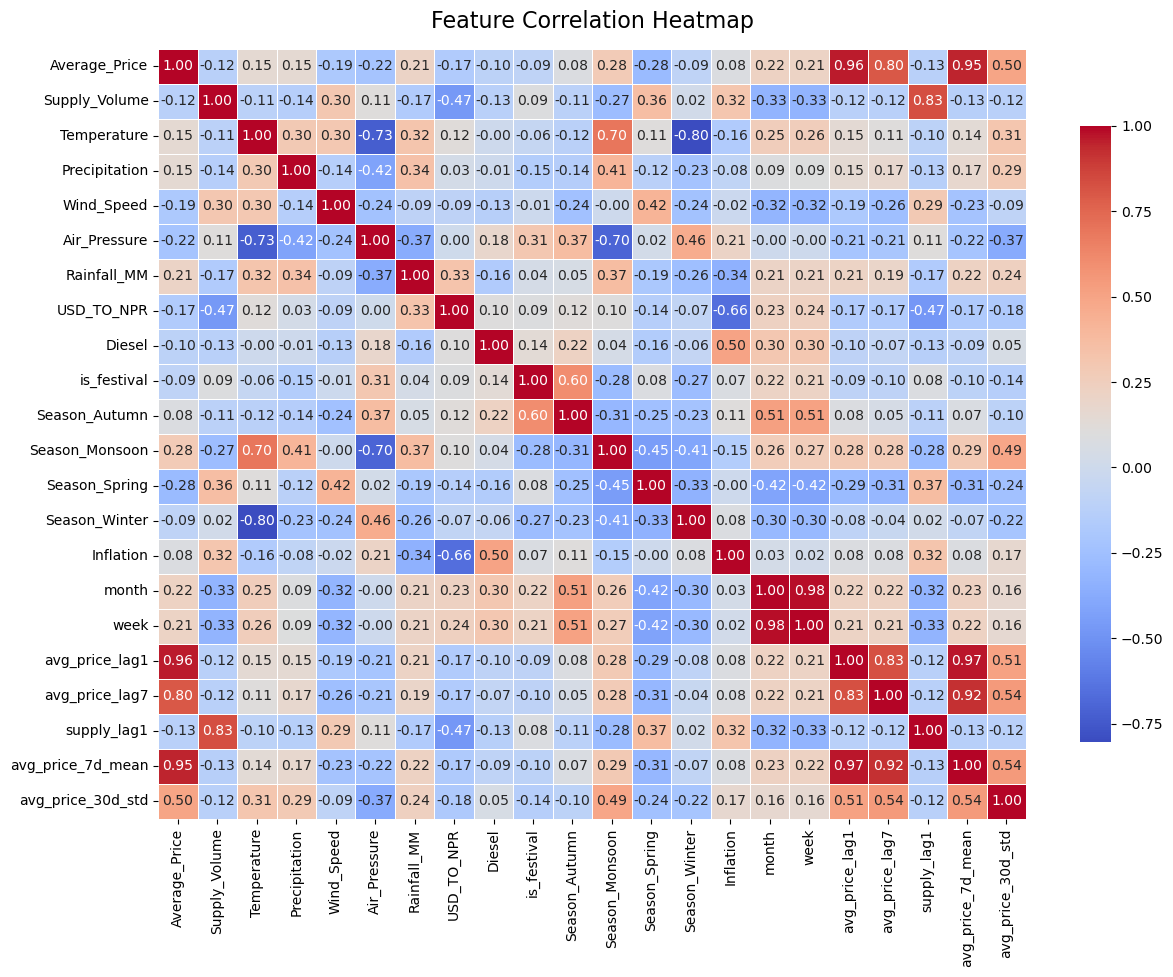

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_df = df.select_dtypes(include=['float64', 'int64', 'int32', 'bool'])

# Compute correlation matrix
corr = num_df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,            # display correlation values
    fmt=".2f",             # 2 decimal places
    cmap='coolwarm',       # color palette
    linewidths=0.5,        # grid lines
    cbar_kws={'shrink': 0.8}
)
plt.title("Feature Correlation Heatmap", fontsize=16, pad=15)
plt.show()


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1382 entries, 2022-01-08 to 2025-10-20
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commodity          1382 non-null   object 
 1   Average_Price      1382 non-null   float64
 2   Unit               1382 non-null   object 
 3   Supply_Volume      1382 non-null   float64
 4   Temperature        1382 non-null   float64
 5   Precipitation      1382 non-null   float64
 6   Wind_Speed         1382 non-null   float64
 7   Air_Pressure       1382 non-null   float64
 8   Rainfall_MM        1382 non-null   float64
 9   USD_TO_NPR         1382 non-null   float64
 10  Diesel             1382 non-null   float64
 11  Season             1382 non-null   object 
 12  is_festival        1382 non-null   int64  
 13  Season_Autumn      1382 non-null   bool   
 14  Season_Monsoon     1382 non-null   bool   
 15  Season_Spring      1382 non-null   bool   
 16  Season

In [48]:
df.shape

(1382, 25)

In [45]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# --- 1) Drop redundant/non-numeric columns ---
to_drop = [
    'commodity_x', 'unit', 'season',  # text
    'season_Monsoon (Jun–Sep)',
    'season_Post-monsoon/Autumn (Oct–Nov)',
    'season_Pre-monsoon/Spring (Mar–May)',
    'season_Winter (Dec–Feb)',
]
to_drop = [c for c in to_drop if c in df.columns]
df_clean = df.drop(columns=to_drop)

# --- 2) Ensure all features are numeric; convert bool -> int ---
for c in df_clean.select_dtypes(include=['bool']).columns:
    df_clean[c] = df_clean[c].astype(int)

# --- 3) Build X/y (numeric only) ---
target = 'average_price'
num_df = df_clean.select_dtypes(include=[np.number]).copy()
# (safety) ensure target present and remove it from X
assert target in num_df.columns, f"{target} not found after cleaning!"
X = num_df.drop(columns=[target])
y = num_df[target]

# --- 4) Chronological split (last 180 days as test) ---
X_train, X_test = X.iloc[:-180], X.iloc[-180:]
y_train, y_test = y.iloc[:-180], y.iloc[-180:]

# --- 5) Train & evaluate ---
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    max_depth=None
)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print("MAE:", round(mean_absolute_error(y_test, pred), 3))

# --- 6) Top feature importances ---
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop features:")
print(fi.head(15))


AssertionError: average_price not found after cleaning!

In [ ]:
# ===========================
# ARIMA for average_price
# ===========================
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX  # use SARIMAX to emulate ARIMA (no seasonal part)

# ---------- 0) Ensure datetime index & target ----------
TARGET = "average_price"

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date']).sort_values('Date').set_index('Date')
else:
    df.index = pd.to_datetime(df.index, errors='coerce')
    df = df.sort_index()

assert TARGET in df.columns, f"{TARGET} not found in df!"

y = df[TARGET].astype(float).copy()

# ---------- 1) Chronological split ----------
HOLDOUT = 180  # last ~6 months as test
train, test = y.iloc[:-HOLDOUT], y.iloc[-HOLDOUT:]
print(f"Train: {train.index[0].date()} → {train.index[-1].date()} | "
      f"Test: {test.index[0].date()} → {test.index[-1].date()} | "
      f"Train n={len(train)}, Test n={len(test)}")

# ---------- 2) Fit ARIMA (p,d,q) ----------
# Simple, robust default; you can tune later
order = (2, 1, 2)  # ARIMA(2,1,2)

model = SARIMAX(
    train,
    order=order,
    seasonal_order=(0, 0, 0, 0),  # no seasonal part (plain ARIMA)
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = model.fit(disp=False)
print(f"\nFitted ARIMA{order}, AIC: {res.aic:.2f}")

# ---------- 3) Predict on test ----------
pred = res.get_forecast(steps=len(test)).predicted_mean
pred.index = test.index  # align index

# ---------- 4) Metrics ----------
def _safe_mape(y_true, y_pred, eps=1e-8):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

def _smape(y_true, y_pred, eps=1e-8):
    y_true, y_pred = np.asarray(y_true, float), np.asarray(y_pred, float)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    denom = np.where(denom < eps, eps, denom)
    return np.mean(np.abs(y_true - y_pred) / denom) * 100

def _mase(y_true, y_pred):
    y_true, y_pred = np.asarray(y_true, float), np.asarray(y_pred, float)
    if len(y_true) < 2: return np.nan
    naive_mae = np.mean(np.abs(np.diff(y_true)))  # naive forecast y_{t-1}
    return mean_absolute_error(y_true, y_pred) / (naive_mae + 1e-8)

def _directional_accuracy(y_true, y_pred):
    y_true, y_pred = np.asarray(y_true, float), np.asarray(y_pred, float)
    if len(y_true) < 2: return np.nan
    return (np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred))).mean() * 100

rmse = np.sqrt(mean_squared_error(test, pred))
mae  = mean_absolute_error(test, pred)
mape = _safe_mape(test, pred)
smape = _smape(test, pred)
r2   = r2_score(test, pred)
mase = _mase(test, pred)
da   = _directional_accuracy(test, pred)

print("\n=== ARIMA Test Metrics ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")
print(f"R²   : {r2:.3f}")
print(f"MASE : {mase:.3f}")
print(f"Directional Accuracy: {da:.2f}%")

# ---------- 5) Plots ----------
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index,  test,  label='Test - Actual', linewidth=2)
plt.plot(test.index,  pred,  label='Test - Predicted', linestyle='--')
plt.title(f'ARIMA{order} — average_price')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.legend(); plt.tight_layout()
plt.show()

resid = test - pred
plt.figure(figsize=(12,3))
plt.plot(test.index, resid)
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('ARIMA Residuals (Actual - Predicted)')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.tight_layout()
plt.show()

# ---------- 6) 30-day forecast ----------
future_days = 30
start = test.index[-1] + pd.Timedelta(days=1)
arima_future = res.get_forecast(steps=future_days).predicted_mean
arima_future.index = pd.date_range(start, periods=future_days, freq='D')

forecast_df = pd.DataFrame({'ARIMA_Forecast': arima_future})
print("\n30-day ARIMA forecast (head):")
print(forecast_df.head())


The ARIMA(2,1,2) model captured general tomato price trends but failed to reproduce short-term fluctuations, achieving an MAE of ₹25 and a MAPE of 37.8%. A negative R² (-3.09) and high MASE (12.5) indicate poor predictive skill relative to a naïve model.
Hence, incorporating seasonality (SARIMA) or external drivers (SARIMAX, XGBoost, LSTM) is necessary for improved accuracy.

In [ ]:
# ========================================
# Seasonal ARIMA (SARIMA) for average_price
# ========================================
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ---------- 0) Prepare target ----------
TARGET = "average_price"

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df = df.dropna(subset=["Date"]).sort_values("Date").set_index("Date")
else:
    df.index = pd.to_datetime(df.index, errors="coerce")
    df = df.sort_index()

y = df[TARGET].astype(float).copy()

# ---------- 1) Split data ----------
HOLDOUT = 180
train, test = y.iloc[:-HOLDOUT], y.iloc[-HOLDOUT:]

print(f"Train: {train.index[0].date()} → {train.index[-1].date()} | "
      f"Test: {test.index[0].date()} → {test.index[-1].date()} | "
      f"Train n={len(train)}, Test n={len(test)}")

# ---------- 2) Fit SARIMA ----------
# (p,d,q) x (P,D,Q,s)
# 's' = seasonal cycle: 12 for monthly data, 7 for weekly, 365 for yearly (daily data)
order = (2, 1, 2)
seasonal_order = (1, 1, 1, 365)  # assume 1-year periodicity in daily data

sarima_model = SARIMAX(
    train,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = sarima_model.fit(disp=False)
print(f"\nFitted SARIMA{order}x{seasonal_order}, AIC: {res.aic:.2f}")

# ---------- 3) Predict ----------
pred = res.get_forecast(steps=len(test)).predicted_mean
pred.index = test.index

# ---------- 4) Metrics ----------
def smape(y_true, y_pred):
    y_true, y_pred = np.asarray(y_true), np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    denom = np.where(denom == 0, 1, denom)
    return np.mean(np.abs(y_true - y_pred) / denom) * 100

rmse = np.sqrt(mean_squared_error(test, pred))
mae = mean_absolute_error(test, pred)
mape = np.mean(np.abs((test - pred) / test)) * 100
smape_val = smape(test, pred)
r2 = r2_score(test, pred)

print("\n=== SARIMA Test Metrics ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"SMAPE: {smape_val:.2f}%")
print(f"R²   : {r2:.3f}")

# ---------- 5) Visualization ----------
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test - Actual', linewidth=2)
plt.plot(test.index, pred, label='Test - Predicted', linestyle='--')
plt.title(f'SARIMA{order}x{seasonal_order} — average_price')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.legend(); plt.tight_layout()
plt.show()

resid = test - pred
plt.figure(figsize=(12,3))
plt.plot(test.index, resid)
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('SARIMA Residuals (Actual - Predicted)')
plt.xlabel('Date'); plt.ylabel('Rs/kg'); plt.tight_layout()
plt.show()

# ---------- 6) 30-day Forecast ----------
future_days = 30
start = test.index[-1] + pd.Timedelta(days=1)
sarima_future = res.get_forecast(steps=future_days).predicted_mean
sarima_future.index = pd.date_range(start, periods=future_days, freq='D')

forecast_df = pd.DataFrame({'SARIMA_Forecast': sarima_future})
print("\n30-day SARIMA forecast (head):")
print(forecast_df.head())
